In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
vet = yf.Ticker("VET-USD")
btc = yf.Ticker("BTC-USD")

hist_vet = vet.history(period="1w", interval = "1m")
hist_btc = btc.history(period="1w", interval = "1m")

for hist in [hist_vet, hist_btc]:
    hist['Open_diff'] = hist['Open'].diff()
    hist['High_diff'] = hist['High'].diff()
    hist['Close_diff'] = hist['Close'].diff()
    hist['Volume_diff'] = hist['Volume'].diff()
    hist['Green'] = hist["Open_diff"] > 0
    hist['Color'] = ['Green' if g else 'Red' for g in hist['Green']]

hist = hist.join(hist_btc, lsuffix="_BTC", rsuffix="_VET")
len(hist[(hist["Color_VET"] == "Red") & (hist["Color_BTC"] == "Red")])



120

In [5]:
hist.keys()

Index(['Open_BTC', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Volume_BTC',
       'Dividends_BTC', 'Stock Splits_BTC', 'Open_diff_BTC', 'High_diff_BTC',
       'Close_diff_BTC', 'Volume_diff_BTC', 'Green_BTC', 'Color_BTC',
       'Open_VET', 'High_VET', 'Low_VET', 'Close_VET', 'Volume_VET',
       'Dividends_VET', 'Stock Splits_VET', 'Open_diff_VET', 'High_diff_VET',
       'Close_diff_VET', 'Volume_diff_VET', 'Green_VET', 'Color_VET'],
      dtype='object')

In [6]:
def backlog(dataset, n):
    og_keys = dataset.keys()
    for key in og_keys:
        for m in range(1, n+1):
            dataset[key + f"_{m}"] = 0
    for i in range(n, len(dataset)):
        for m in range(1, n+1):
            for key in og_keys:
                dataset[key + f"_{m}"] = dataset[key][i-m]

backlog(hist, 3)
hist.keys()

Index(['Open_BTC', 'High_BTC', 'Low_BTC', 'Close_BTC', 'Volume_BTC',
       'Dividends_BTC', 'Stock Splits_BTC', 'Open_diff_BTC', 'High_diff_BTC',
       'Close_diff_BTC',
       ...
       'Close_diff_VET_3', 'Volume_diff_VET_1', 'Volume_diff_VET_2',
       'Volume_diff_VET_3', 'Green_VET_1', 'Green_VET_2', 'Green_VET_3',
       'Color_VET_1', 'Color_VET_2', 'Color_VET_3'],
      dtype='object', length=104)

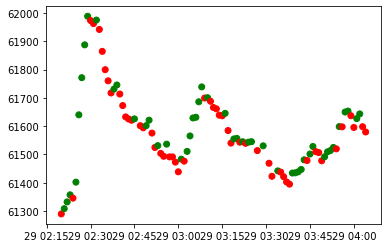

In [2]:
# plt.scatter(x=hist.index, y=hist["Open"], color=hist["Color"])
plt.scatter(x=hist.index[-100:], y=hist["Open_VET"][-100:], color=hist["Color_VET"][-100:])